In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit as fit

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['scatter.marker'] = "x"
plt.rcParams['font.size'] = 12

In [2]:
def uValueToError(u):
    return 0.008 * u + 0.008
def iValueToError(i):
    return 0.02 * i + 0.010

iAmpereUConstR30Mean = np.mean(np.array([
    1.92, 1.91, 1.91, 1.91, 1.92, 1.89, 1.9, 1.88, 1.87, 1.87, 1.90
]))
iAmpereUConstR30MeanError = iValueToError(iAmpereUConstR30Mean) * 0.34

iAmpereUConstR40Mean = np.mean(np.array([
    1.40, 1.40, 1.41,1.42,1.41,1.39,1.41,1.39, 1.40, 1.40, 1.39
]))
iAmpereUConstR40MeanError = iValueToError(iAmpereUConstR40Mean) * 0.34

iAmpereUConstR50Mean = np.mean(np.array([
    1.15, 1.16, 1.16, 1.15, 1.16, 1.16, 1.15, 1.15, 1.16, 1.16, 1.16
]))
iAmpereUConstR50MeanError = iValueToError(iAmpereUConstR50Mean) * 0.34
uConstVolt = 180
uConstVoltError = uValueToError(uConstVolt)

rDataMeter = 0.001 * np.array([30, 40, 50], dtype=np.float64)
rDataMeterError = 0.001 * np.array([0.25, 0.25, 0.25], dtype=np.float64)

uVoltIConstR30Mean = np.mean(np.array([
    143, 143, 144, 144, 143, 144, 144, 144, 144, 144
], dtype=np.float64))
uVoltIConstR30MeanError = uValueToError(uVoltIConstR30Mean) * 0.34
uVoltIConstR40Mean = np.mean(np.array([
    195,197,197,199,200,197,200,198,198,196
], dtype=np.float64))
uVoltIConstR40MeanError = uValueToError(uVoltIConstR40Mean) * 0.34

uVoltIConstR50Mean = np.mean(np.array([
    299,297,299,298,299,295,299,298,300,297
], dtype=np.float64))
uVoltIConstR50MeanError = uValueToError(uVoltIConstR50Mean) * 0.34
iConstAmpere = 1.5
iConstAmpereError = iValueToError(iConstAmpere)


# Print the i and u arrays for the 3 different r values with corresponding errors
print("iAmpereUConstR30Mean:", iAmpereUConstR30Mean, "+/-", iAmpereUConstR30MeanError)
print("iAmpereUConstR40Mean:", iAmpereUConstR40Mean, "+/-", iAmpereUConstR40MeanError)
print("iAmpereUConstR50Mean:", iAmpereUConstR50Mean, "+/-", iAmpereUConstR50MeanError)
print("uVoltIConstR30Mean:", uVoltIConstR30Mean, "+/-", uVoltIConstR30MeanError)
print("uVoltIConstR40Mean:", uVoltIConstR40Mean, "+/-", uVoltIConstR40MeanError)
print("uVoltIConstR50Mean:", uVoltIConstR50Mean, "+/-", uVoltIConstR50MeanError)

# Print the r values
print("rDataMeter:", rDataMeter)
print("rDataMeterError:", rDataMeterError)

# Print iConstAmpere and uConstVolt with errors
print("iConstAmpere:", iConstAmpere, "+/-", iConstAmpereError)
print("uConstVolt:", uConstVolt, "+/-", uConstVoltError)

iAmpereUConstR30Mean: 1.8981818181818182 +/- 0.016307636363636368
iAmpereUConstR40Mean: 1.401818181818182 +/- 0.012932363636363638
iAmpereUConstR50Mean: 1.1563636363636363 +/- 0.011263272727272728
uVoltIConstR30Mean: 143.7 +/- 0.393584
uVoltIConstR40Mean: 197.7 +/- 0.540464
uVoltIConstR50Mean: 298.1 +/- 0.8135520000000002
rDataMeter: [0.03 0.04 0.05]
rDataMeterError: [0.00025 0.00025 0.00025]
iConstAmpere: 1.5 +/- 0.04
uConstVolt: 180 +/- 1.448


In [3]:
def calcPlottedValueFromQuantities(rSpule, u, i):
    return np.sqrt(125.0 / 32.0) * (rSpule / (nSpule * mu0)) * np.sqrt(u) / i

def getErrorForNthArgumentOfFunction(f, paramArray, indexOfToBeCalculatedErrorN, errorOfNthParam):
    eps = 1e-5 * np.longdouble(paramArray[indexOfToBeCalculatedErrorN])
    if eps == 0:
        eps = 1e-10
    eps = np.longdouble(eps)
    paramsWithEps = np.array(paramArray, dtype=np.longdouble)
    copiedParams = np.array(paramArray, dtype=np.longdouble)
    paramsWithEps[indexOfToBeCalculatedErrorN] += eps
    return (np.longdouble(f(*paramsWithEps)) - np.longdouble(f(*copiedParams))) * np.longdouble(errorOfNthParam) / eps

def getCombinedErrorForAllParamsOfFunction(f, paramArray, errorArray):
    return np.sqrt(np.sum([getErrorForNthArgumentOfFunction(f, paramArray, i, errorArray[i])**2 for i in range(len(paramArray))]))


rSpuleMeter = 150 * 0.001
rSpuleMeterErr = 2 * 0.001

nSpule = 130
mu0  = 4 * np.pi * 10**-7

xValuesUConst = np.empty((0))
yValuesUConst = np.empty((0))
xErrorsUConst = np.empty((0))
yErrorsUConst = np.empty((0))

def fillErrorForPoint(r, rErr, u, uErr, i, iErr, xValues, yValues, xErrors, yErrors):
    xValues = np.concatenate((xValues, [r]))
    xErrors = np.concatenate((xErrors, [rErr]))
    yValues = np.concatenate((yValues, [calcPlottedValueFromQuantities(rSpuleMeter, u, i)]))
    yErrors = np.concatenate((yErrors, [getCombinedErrorForAllParamsOfFunction(calcPlottedValueFromQuantities, [rSpuleMeter, u, i], [rSpuleMeterErr, uErr, iErr])]))

    return xValues, yValues, xErrors, yErrors

xValuesUConst, yValuesUConst, xErrorsUConst, yErrorsUConst = fillErrorForPoint(
    rDataMeter[0], rDataMeterError[0], uConstVolt, uConstVoltError, iAmpereUConstR30Mean, iAmpereUConstR30MeanError, xValuesUConst, yValuesUConst, xErrorsUConst, yErrorsUConst)

xValuesUConst, yValuesUConst, xErrorsUConst, yErrorsUConst = fillErrorForPoint(
    rDataMeter[1], rDataMeterError[1], uConstVolt, uConstVoltError, iAmpereUConstR40Mean, iAmpereUConstR40MeanError, xValuesUConst, yValuesUConst, xErrorsUConst, yErrorsUConst)
xValuesUConst, yValuesUConst, xErrorsUConst, yErrorsUConst = fillErrorForPoint(
    rDataMeter[2], rDataMeterError[2], uConstVolt, uConstVoltError, iAmpereUConstR50Mean, iAmpereUConstR50MeanError, xValuesUConst, yValuesUConst, xErrorsUConst, yErrorsUConst)

xValuesIConst = np.empty((0))
yValuesIConst = np.empty((0))
xErrorsIConst = np.empty((0))
yErrorsIConst = np.empty((0))



xValuesIConst, yValuesIConst, xErrorsIConst, yErrorsIConst = fillErrorForPoint(
    rDataMeter[0], rDataMeterError[0], uVoltIConstR30Mean, uVoltIConstR30MeanError, iConstAmpere, iConstAmpereError, xValuesIConst, yValuesIConst, xErrorsIConst, yErrorsIConst)
xValuesIConst, yValuesIConst, xErrorsIConst, yErrorsIConst = fillErrorForPoint(
    rDataMeter[1], rDataMeterError[1], uVoltIConstR40Mean, uVoltIConstR40MeanError, iConstAmpere, iConstAmpereError, xValuesIConst, yValuesIConst, xErrorsIConst, yErrorsIConst)
xValuesIConst, yValuesIConst, xErrorsIConst, yErrorsIConst = fillErrorForPoint(
    rDataMeter[2], rDataMeterError[2], uVoltIConstR50Mean, uVoltIConstR50MeanError, iConstAmpere, iConstAmpereError, xValuesIConst, yValuesIConst, xErrorsIConst, yErrorsIConst)



Slope (m): 414133.189099801
Intercept (b): -0.0011668995176693493
Slope uncertainty: 13925.28651644208
Intercept uncertainty: 0.001325879612565959
Specific Charge: 1.72e+11
Specific Charge Error: 1.15e+10


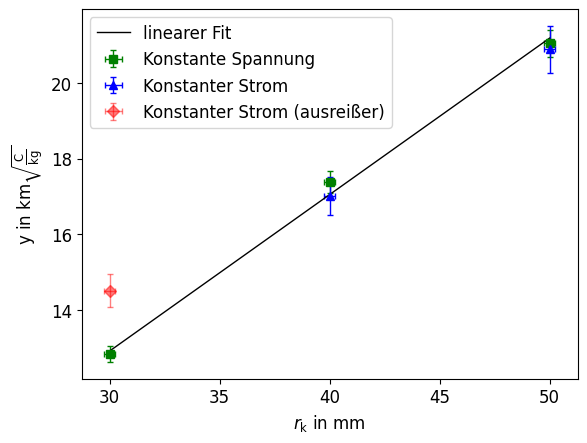

In [4]:
plt.errorbar(1000 * xValuesUConst, 0.001*yValuesUConst, xerr=1000*xErrorsUConst, yerr=0.001*yErrorsUConst, fmt="s", label="Konstante Spannung", color="green", capsize=2)
plt.errorbar(1000 * xValuesIConst[1:], 0.001*yValuesIConst[1:], xerr=1000*xErrorsIConst[1:], yerr=0.001*yErrorsIConst[1:], fmt="^", label="Konstanter Strom", color="blue", capsize=2)
plt.errorbar(1000 * xValuesIConst[0], 0.001*yValuesIConst[0], xerr=1000*xErrorsIConst[0], yerr=0.001*yErrorsIConst[0], fmt="D", color="red", alpha=0.5, capsize=2, label="Konstanter Strom (ausreißer)")    

plt.xlabel(r"$r_\text{k}$ in mm")
plt.ylabel(r"y in $\text{km} \sqrt{\frac{\text{C}}{\text{kg}}}$")

rFitValues = np.array([rDataMeter[0], rDataMeter[1], rDataMeter[1], rDataMeter[2], rDataMeter[2]])
yFitValues = np.array([yValuesUConst[0], yValuesUConst[1], yValuesIConst[1], yValuesUConst[2], yValuesIConst[2]])
yFitErrors = np.array([yErrorsUConst[0], yErrorsUConst[1], yErrorsIConst[1], yErrorsUConst[2], yErrorsIConst[2]])

# BEGIN: Fit function
def linear_fit(x, m, b):
    return m * (x - b)
# END: Fit function

# Fit the function
fit_params, fit_cov = fit(linear_fit, rFitValues, yFitValues, sigma=yFitErrors, p0=[814854, 0])

# Extract the fit parameters
m = fit_params[0]
b = fit_params[1]

# Extract the uncertainties
m_err = np.sqrt(fit_cov[0, 0])
b_err = np.sqrt(fit_cov[1, 1])

# Print the results
print("Slope (m):", m)
print("Intercept (b):", b)
print("Slope uncertainty:", m_err)
print("Intercept uncertainty:", b_err)

# Plot the linear fit
plt.plot(1000*rFitValues, 0.001*linear_fit(rFitValues, m, b), label="linearer Fit", color="black")


plt.legend()

# Calculate the specific charge
specific_charge = m**2
specific_charge_err = 2 * m * m_err

# Print the result with its error
print("Specific Charge: {:.2e}".format(specific_charge))
print("Specific Charge Error: {:.2e}".format(specific_charge_err))

In [8]:

bErde = 20.0 * 0.001 * 0.001
deltaI = 2 * ((5/4)**(1.5)) * (rSpuleMeter / (nSpule * mu0)) * bErde
print("deltaI:", deltaI)


deltaI: 0.051329029573354126
